<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

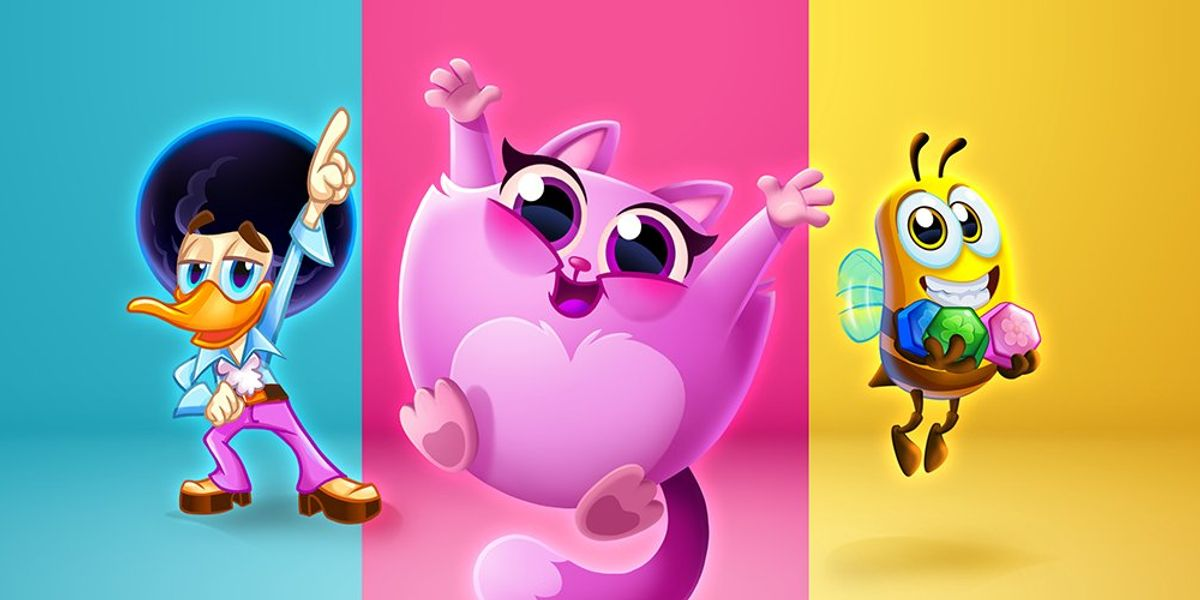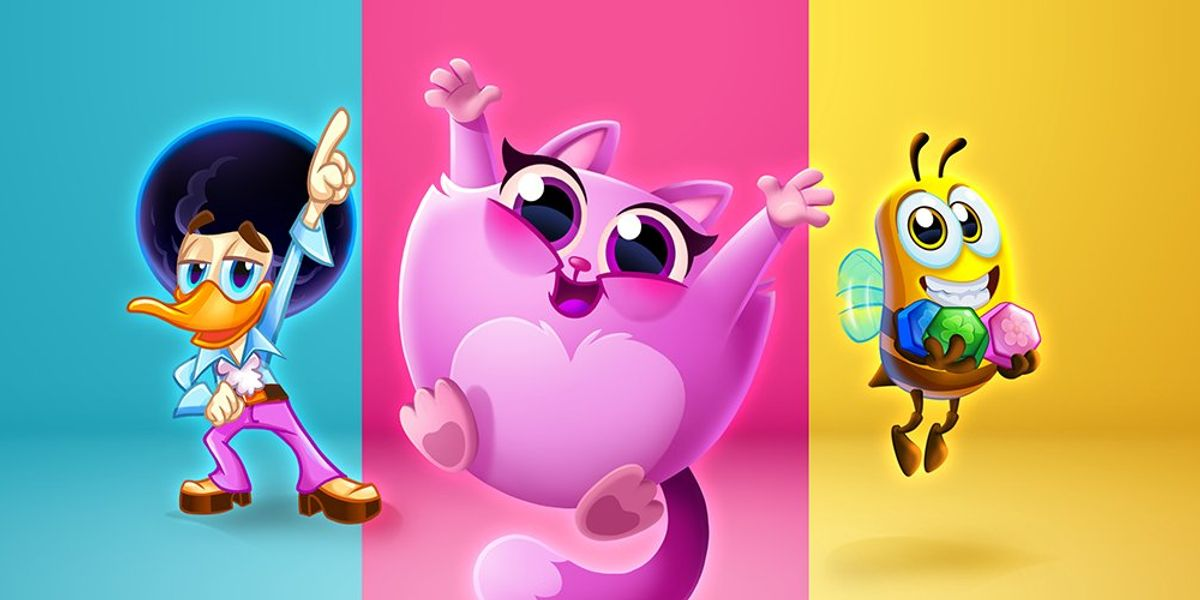# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np
import statsmodels.stats.api as sms

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

In [2]:
# datos
df=pd.read_csv(r"C:\Users\franc\bootcamp\semana_6\6.4_lab-AB-Testing\data\cookie_cats.csv")

df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# transformacion
df.replace(to_replace=True, value=1, inplace=True)
df.replace(to_replace=False, value=0, inplace=True)
df.replace(to_replace='gate_30', value='A', inplace=True)
df.replace(to_replace='gate_40', value='B', inplace=True)
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,0,0
1,337,A,38,1,0
2,377,B,165,1,0
3,483,B,1,0,0
4,488,B,179,1,1


In [4]:
print(len(df[df.version=='A']))
print(len(df[df.version=='B']))

44700
45489


In [15]:
# muestreo
control = df[df.version=='A'].sample(n=44700, random_state=42)

tratamiento = df[df.version=='B'].sample(n=44700, random_state=42)

ab_test = pd.concat([control, tratamiento], axis=0)

ab_test.reset_index(drop=True, inplace=True)

ab_test.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,6531033,A,35,0,0
1,8003009,A,4,0,0
2,5566807,A,23,1,0
3,64235,A,1,0,0
4,6210551,A,7,0,0


In [16]:
ab_test.version.value_counts()

A    44700
B    44700
Name: version, dtype: int64

In [17]:
# testeo para retention_1
control_res=ab_test[ab_test.version =='A']['retention_1']

trat_res=ab_test[ab_test.version =='B']['retention_1']


In [18]:
observaciones = [control_res.count(), trat_res.count()]

retention =[control_res.sum(), trat_res.sum()] 

z_score, p_valor = proportions_ztest(retention, nobs=observaciones)
(control_a, tratamiento_a), (control_b, tratamiento_b) = proportion_confint(retention, 
                                                                            nobs=observaciones,
                                                                            alpha=0.05)
print(f'z-score: {z_score:.2f}')
print(f'p-valor: {p_valor:.3f}')
print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')
print(f'intervalo conf 95% para grupo tratamiento: [{tratamiento_a:.3f}, {tratamiento_b:.3f}]')

z-score: 1.69
p-valor: 0.091
intervalo conf 95% para grupo control: [0.444, 0.453]
intervalo conf 95% para grupo tratamiento: [0.438, 0.447]


In [19]:
# testeo para retention_7
control_res2=ab_test[ab_test.version =='A']['retention_7']

trat_res2=ab_test[ab_test.version =='B']['retention_7']


In [20]:
observaciones2 = [control_res2.count(), trat_res2.count()]

retention2 =[control_res2.sum(), trat_res2.sum()] 

z_score, p_valor = proportions_ztest(retention2, nobs=observaciones2)
(control_a, tratamiento_a), (control_b, tratamiento_b) = proportion_confint(retention2, 
                                                                            nobs=observaciones2,
                                                                            alpha=0.05)
print(f'z-score: {z_score:.2f}')
print(f'p-valor: {p_valor:.3f}')
print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')
print(f'intervalo conf 95% para grupo tratamiento: [{tratamiento_a:.3f}, {tratamiento_b:.3f}]')

z-score: 2.98
p-valor: 0.003
intervalo conf 95% para grupo control: [0.187, 0.194]
intervalo conf 95% para grupo tratamiento: [0.179, 0.186]


In [94]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.